In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn
import seaborn as sns

In [3]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 5\ToyotaCorolla_updated.csv")
data.head(11)

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170
5,6,12950,32,61000,90,2000,3,5,210,1170
6,7,16900,27,94612,90,2000,3,5,210,1245
7,8,18600,30,75889,90,2000,3,5,210,1245
8,9,21500,27,19700,192,1800,3,5,100,1185
9,10,12950,23,71138,69,1900,3,5,185,1105


In [4]:
data.drop(columns='Id',inplace=True)

In [5]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


c:\Users\heysr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


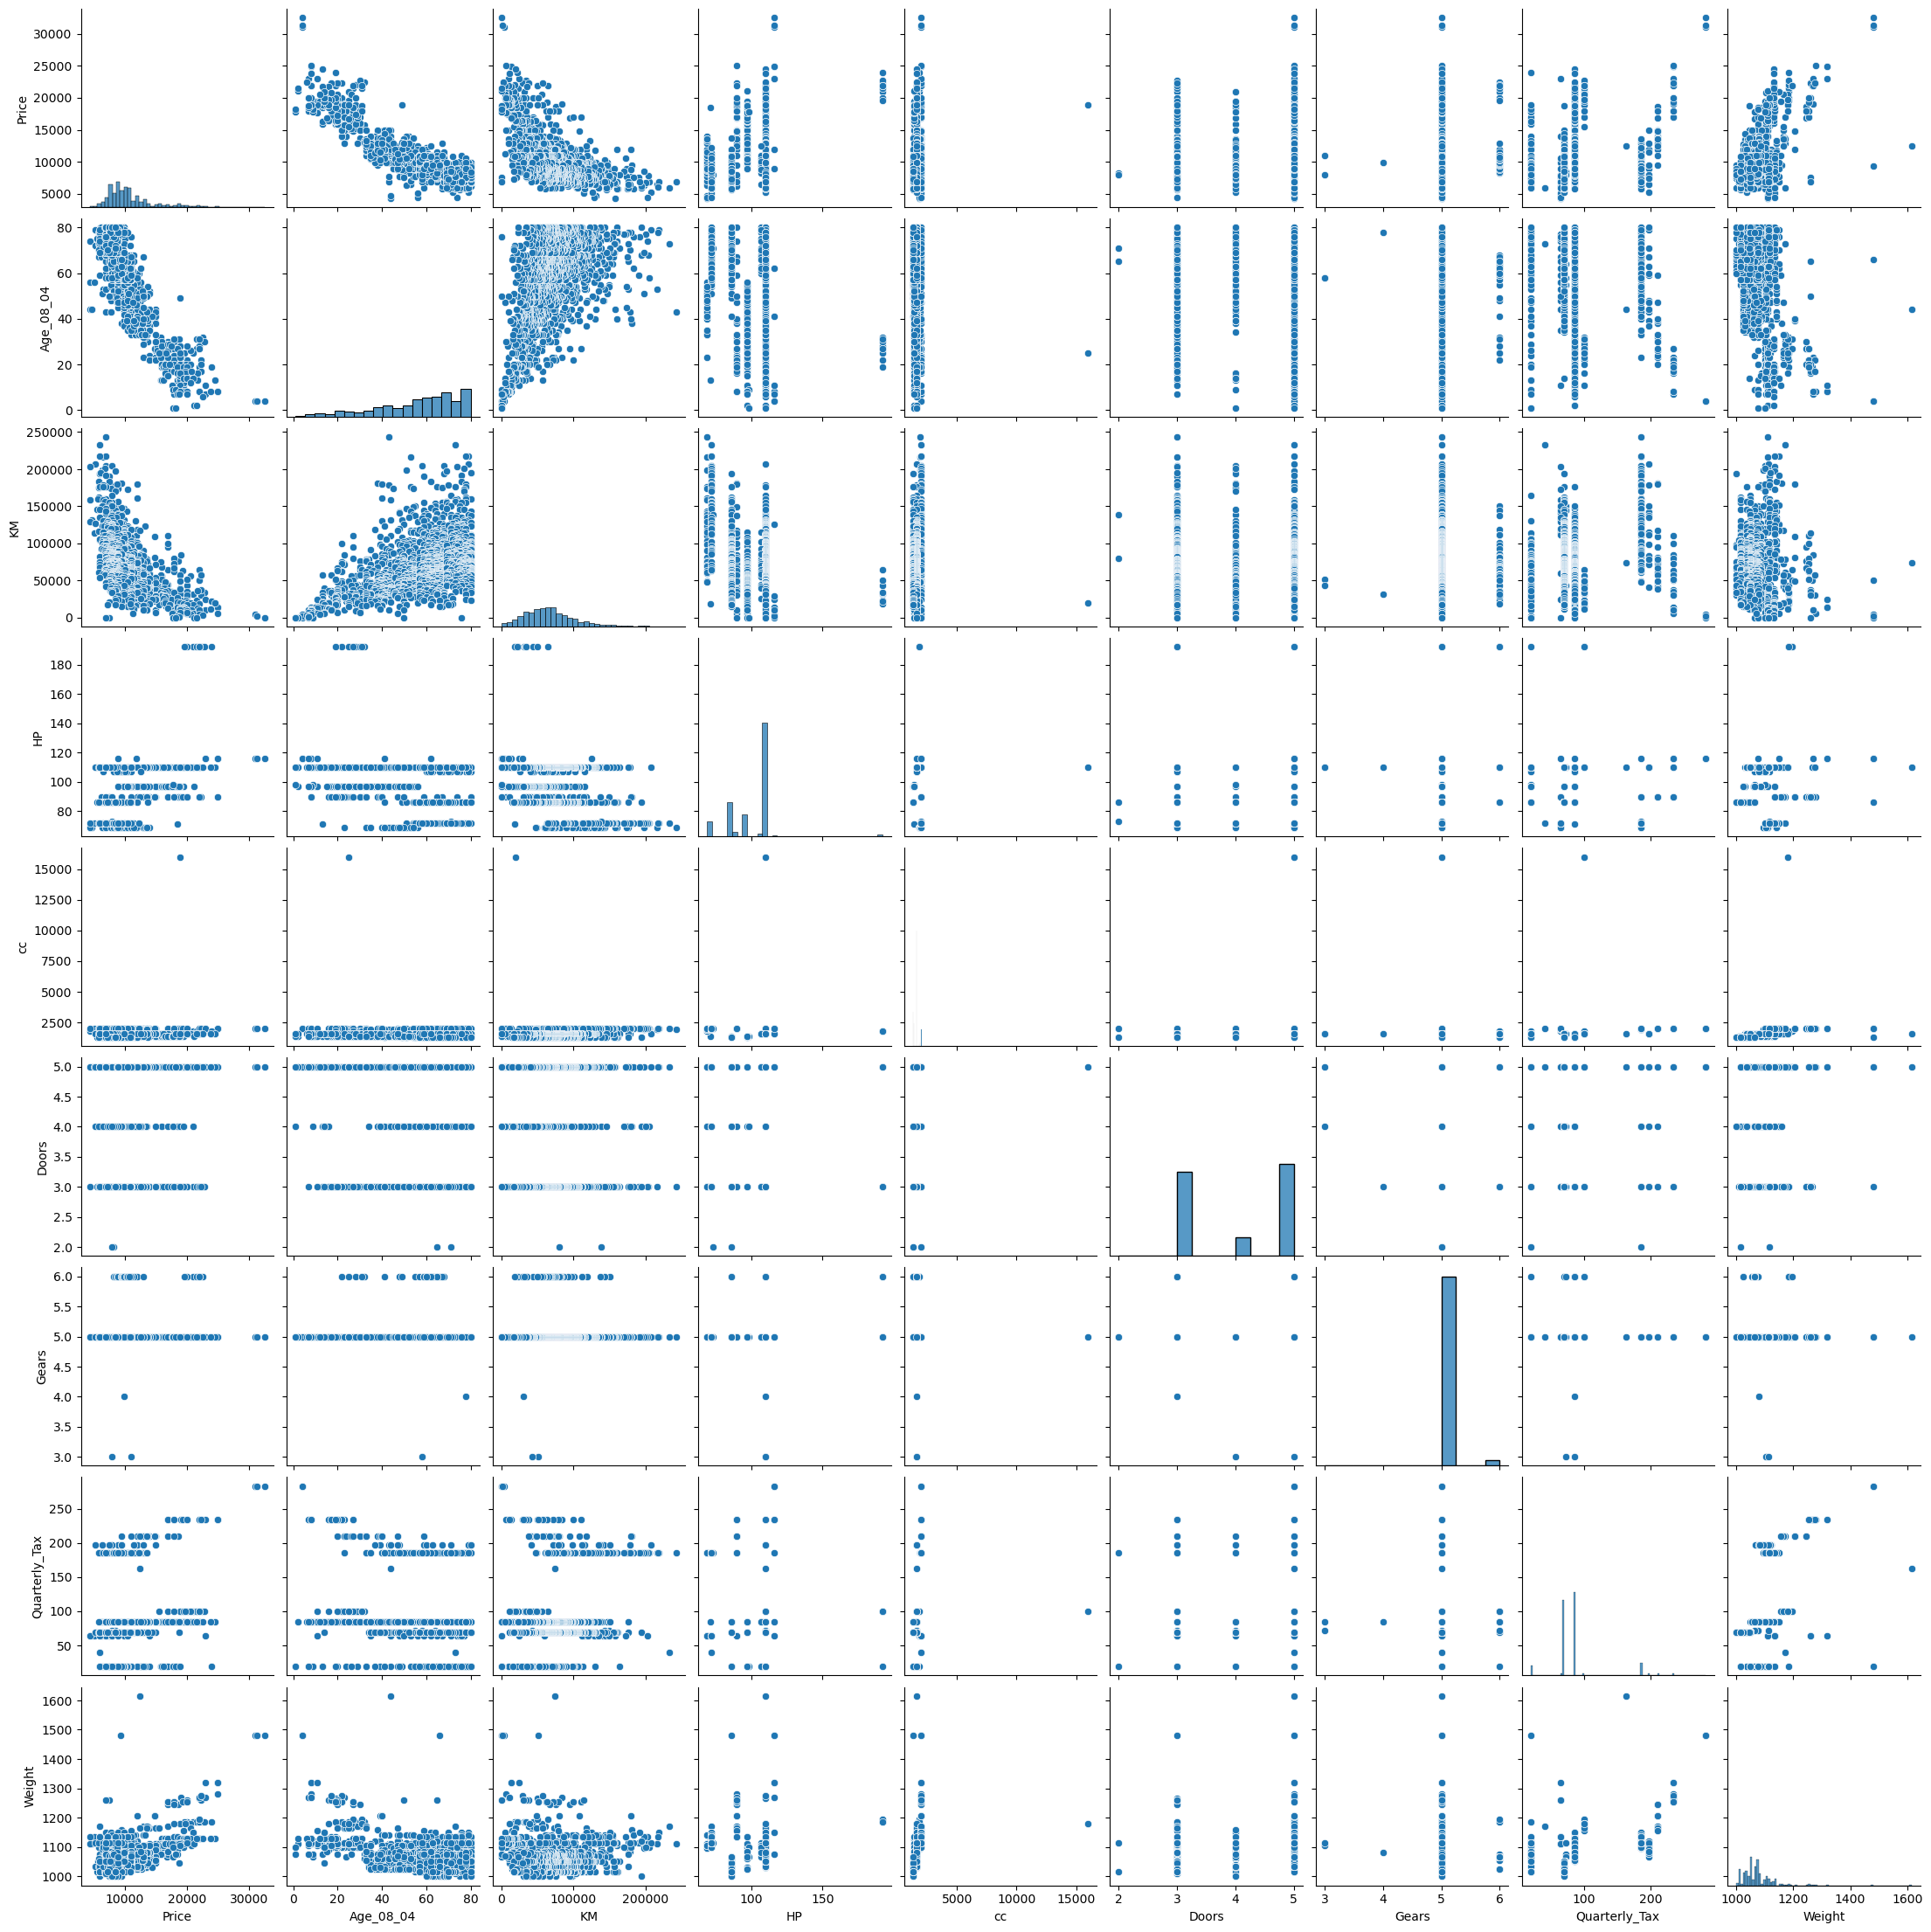

In [7]:
sns.pairplot(data)

In [8]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model2 = smf.ols('Price~Age_08_04', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model3 = smf.ols('Price~KM', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.76e-124
Time:                        19:20:23   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model4 = smf.ols('Price~HP', data = data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.93e-34
Time:                        19:20:23   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model6 = smf.ols('Price~cc', data = data).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.55e-06
Time:                        19:20:23   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model7 = smf.ols('Price~Gears', data = data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Fri, 01 Dec 2023   Prob (F-statistic):             0.0168
Time:                        19:20:23   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model7 = smf.ols('Price~Quarterly_Tax', data = data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           4.41e-17
Time:                        19:20:23   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model8 = smf.ols('Price~+Weight', data = data).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.63e-130
Time:                        19:20:23   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
rsq_age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight' ,data=data).fit().rsquared
vif_age_08_04 = 1/(1-rsq_age_08_04)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight' ,data=data).fit().rsquared
vif_km= 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Gears+Quarterly_Tax+Weight' ,data=data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight' ,data=data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight' ,data=data).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Gears+Weight' ,data=data).fit().rsquared
vif_tax = 1/(1-rsq_tax)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax' ,data=data).fit().rsquared
vif_weight = 1/(1-rsq_weight)

d1 = {' VARIABLE' : ['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight'],
      'VIF': [rsq_weight,rsq_tax,rsq_gears,rsq_cc,rsq_hp,rsq_km,rsq_age_08_04]}
vif_frame = pd.DataFrame(d1)
vif_frame

,VARIABLE,VIF
0,Age_08_04,0.575852
1,KM,0.564910
2,HP,0.055789
3,cc,0.140594
4,Gears,0.291938
5,Quarterly_Tax,0.430316
6,Weight,0.469384


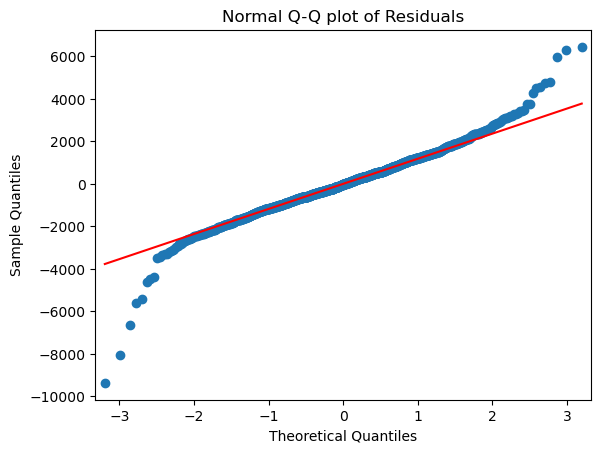

In [18]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

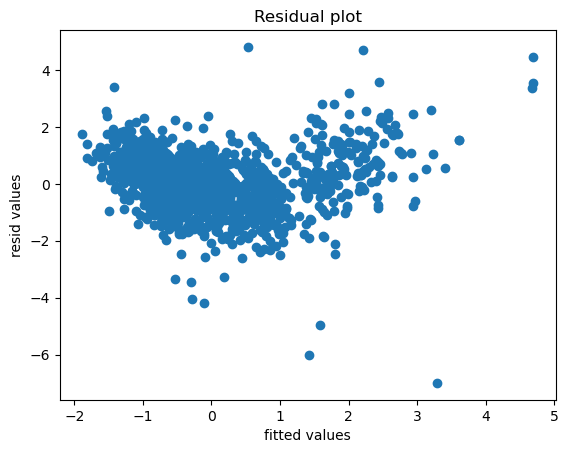

In [19]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("resid values")
plt.show()

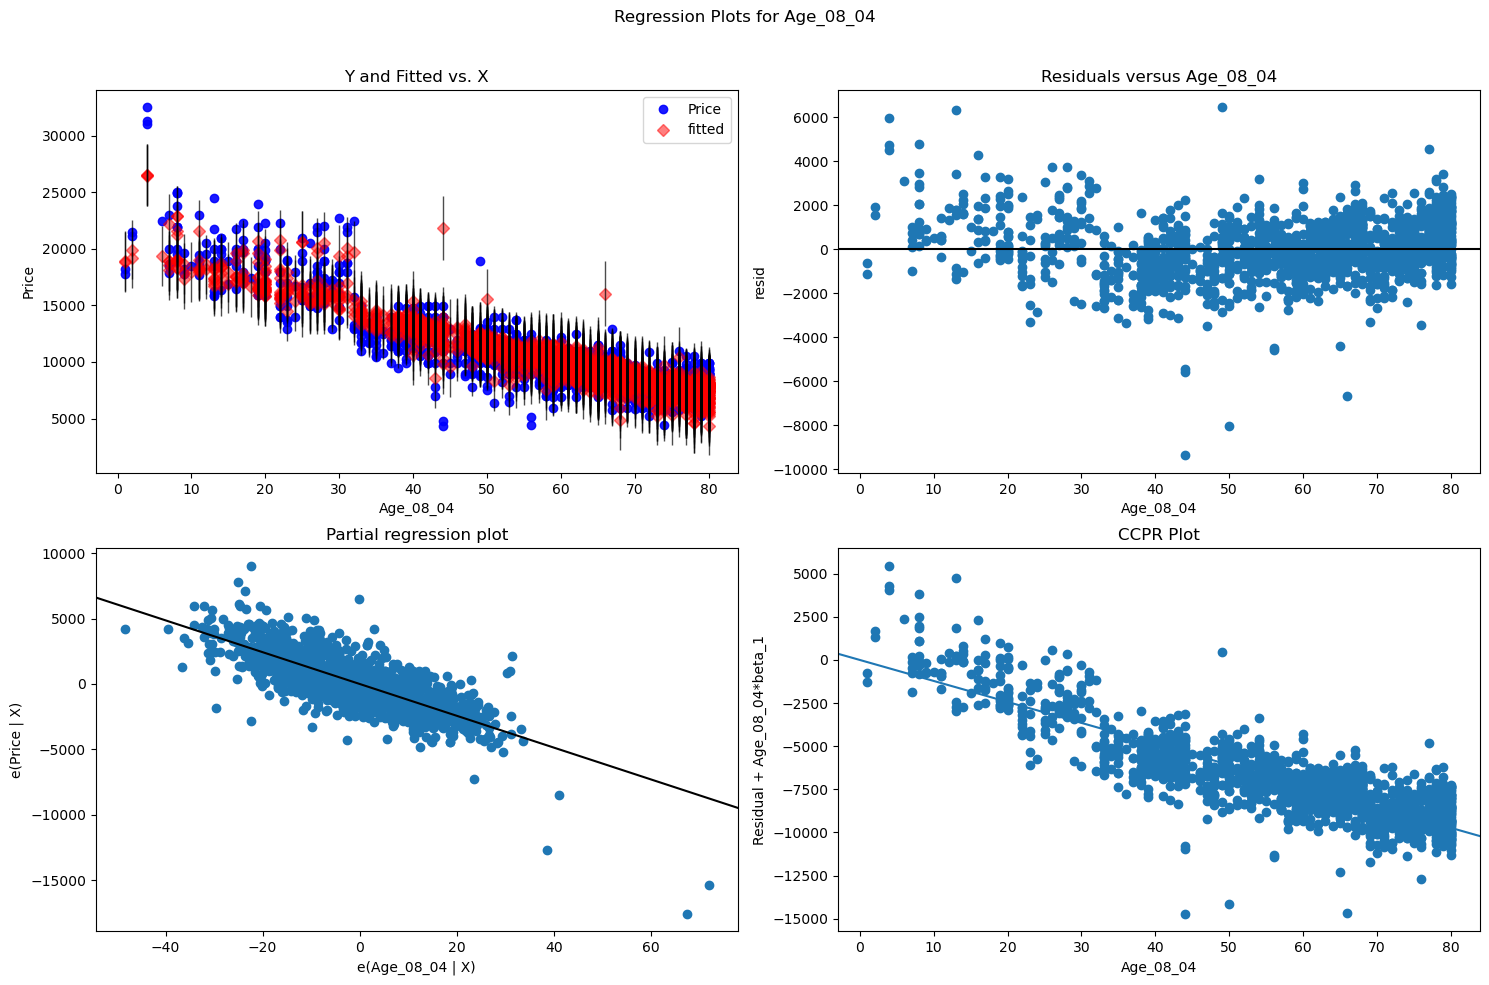

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

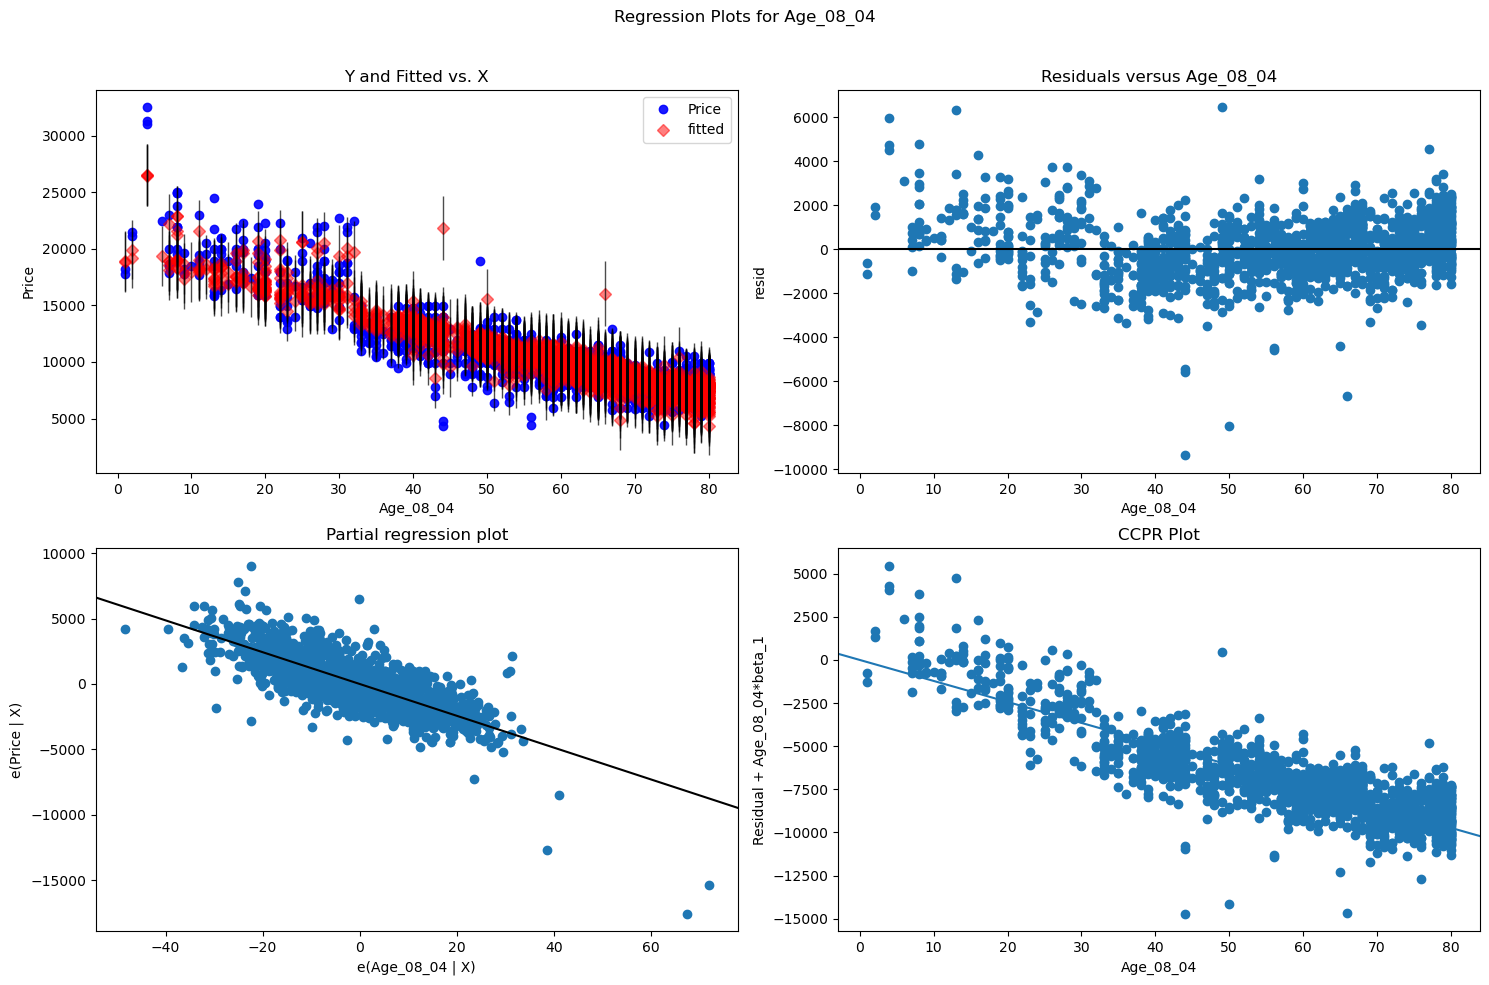

In [21]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

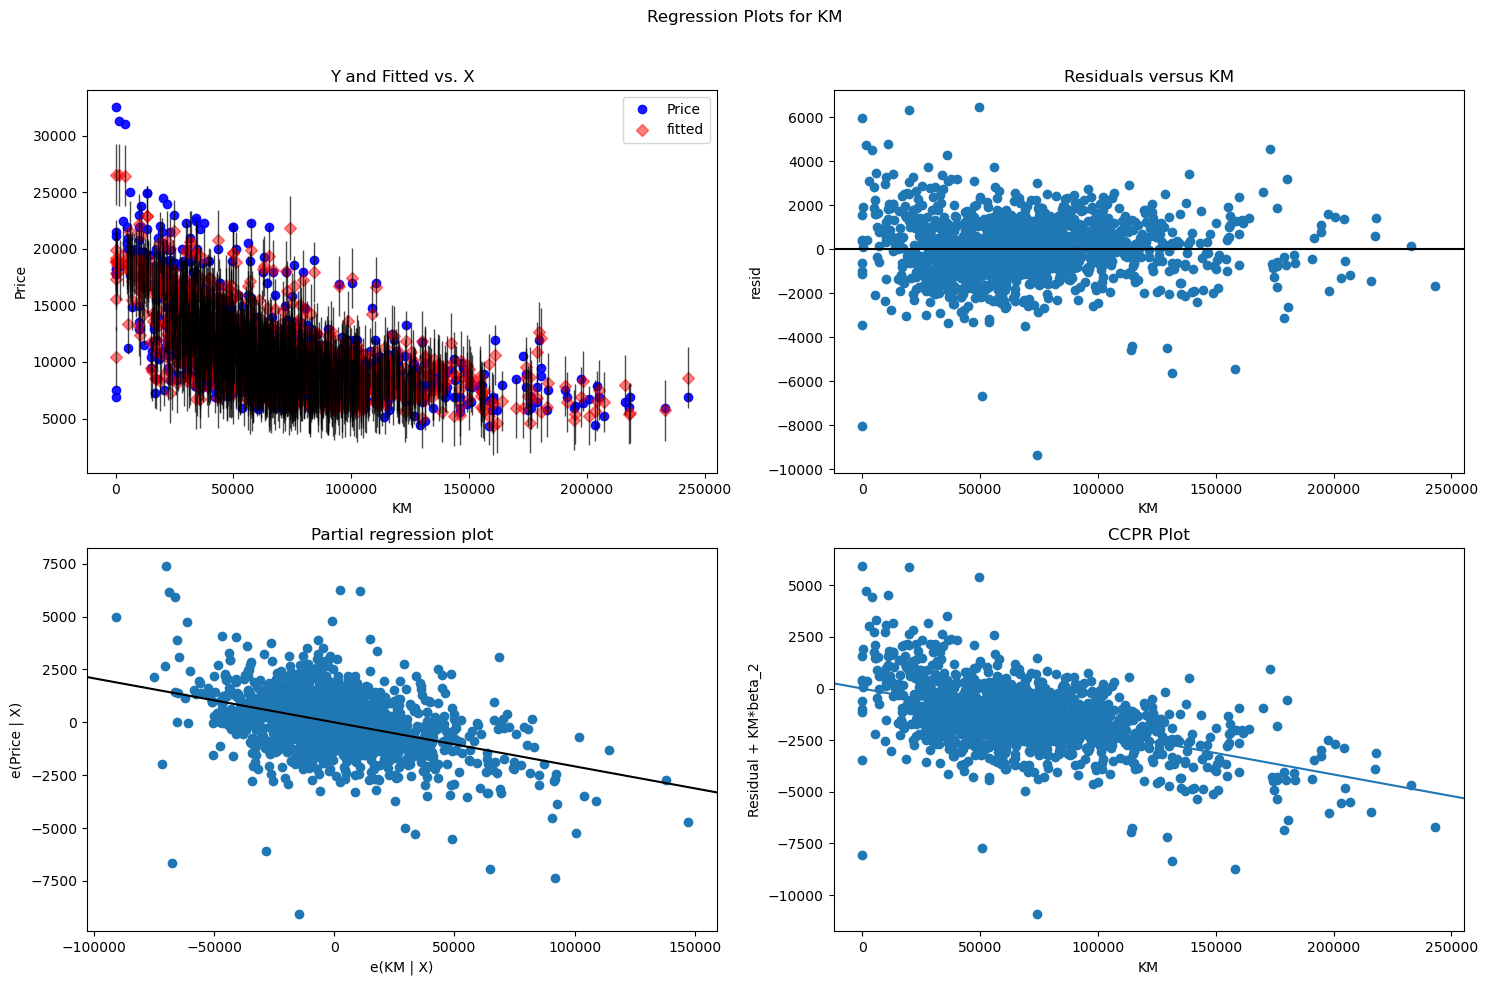

In [22]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

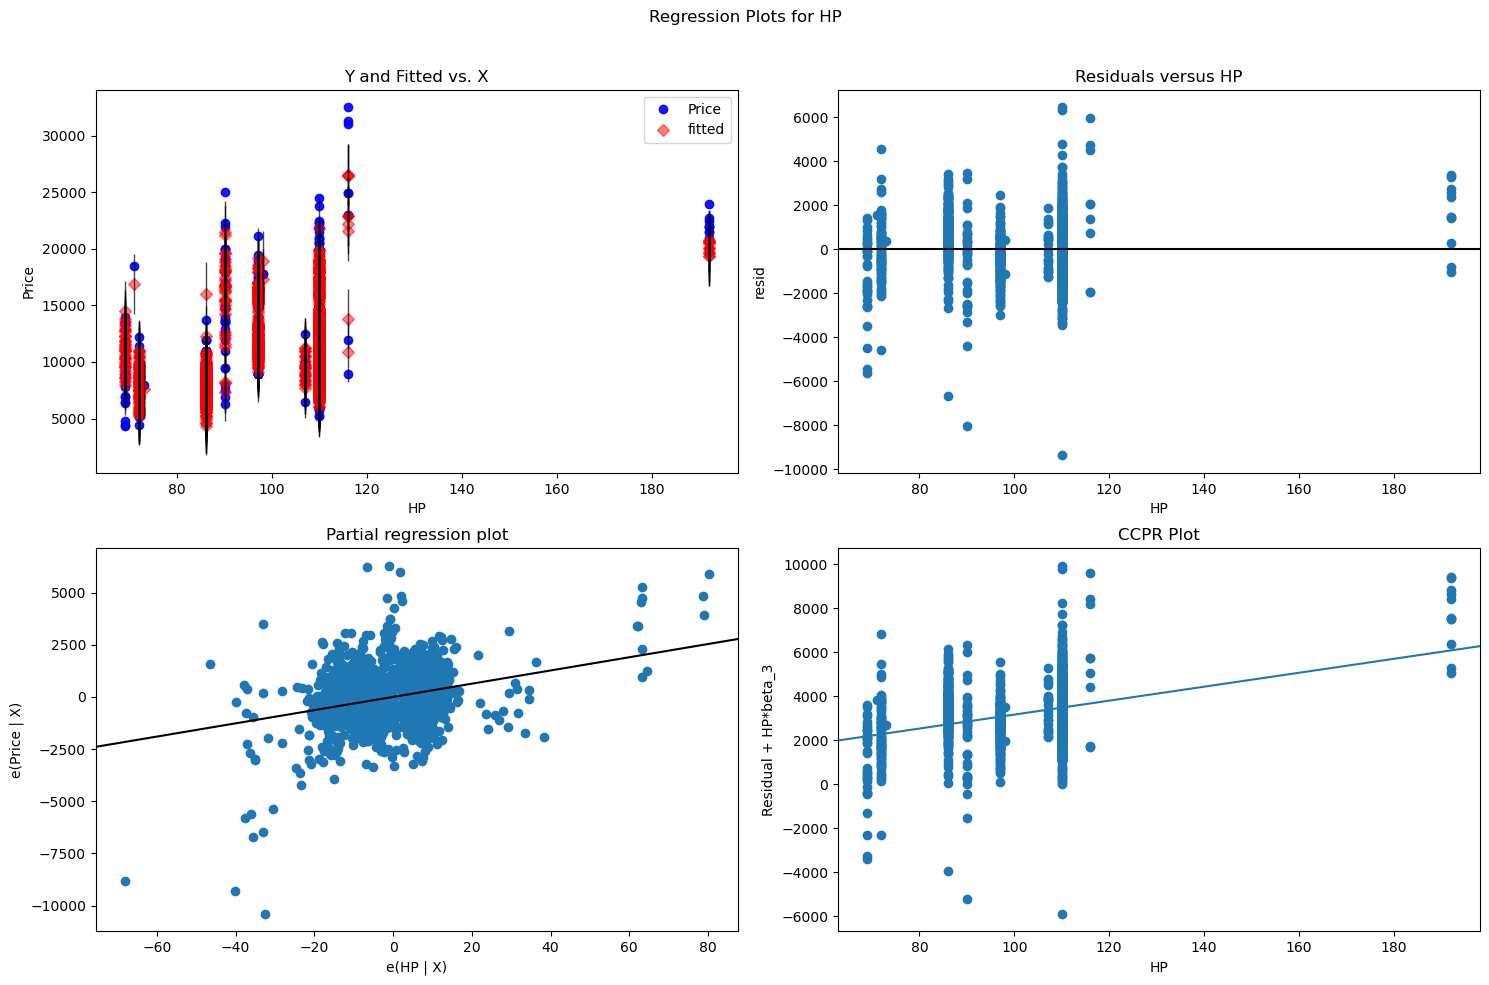

In [23]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

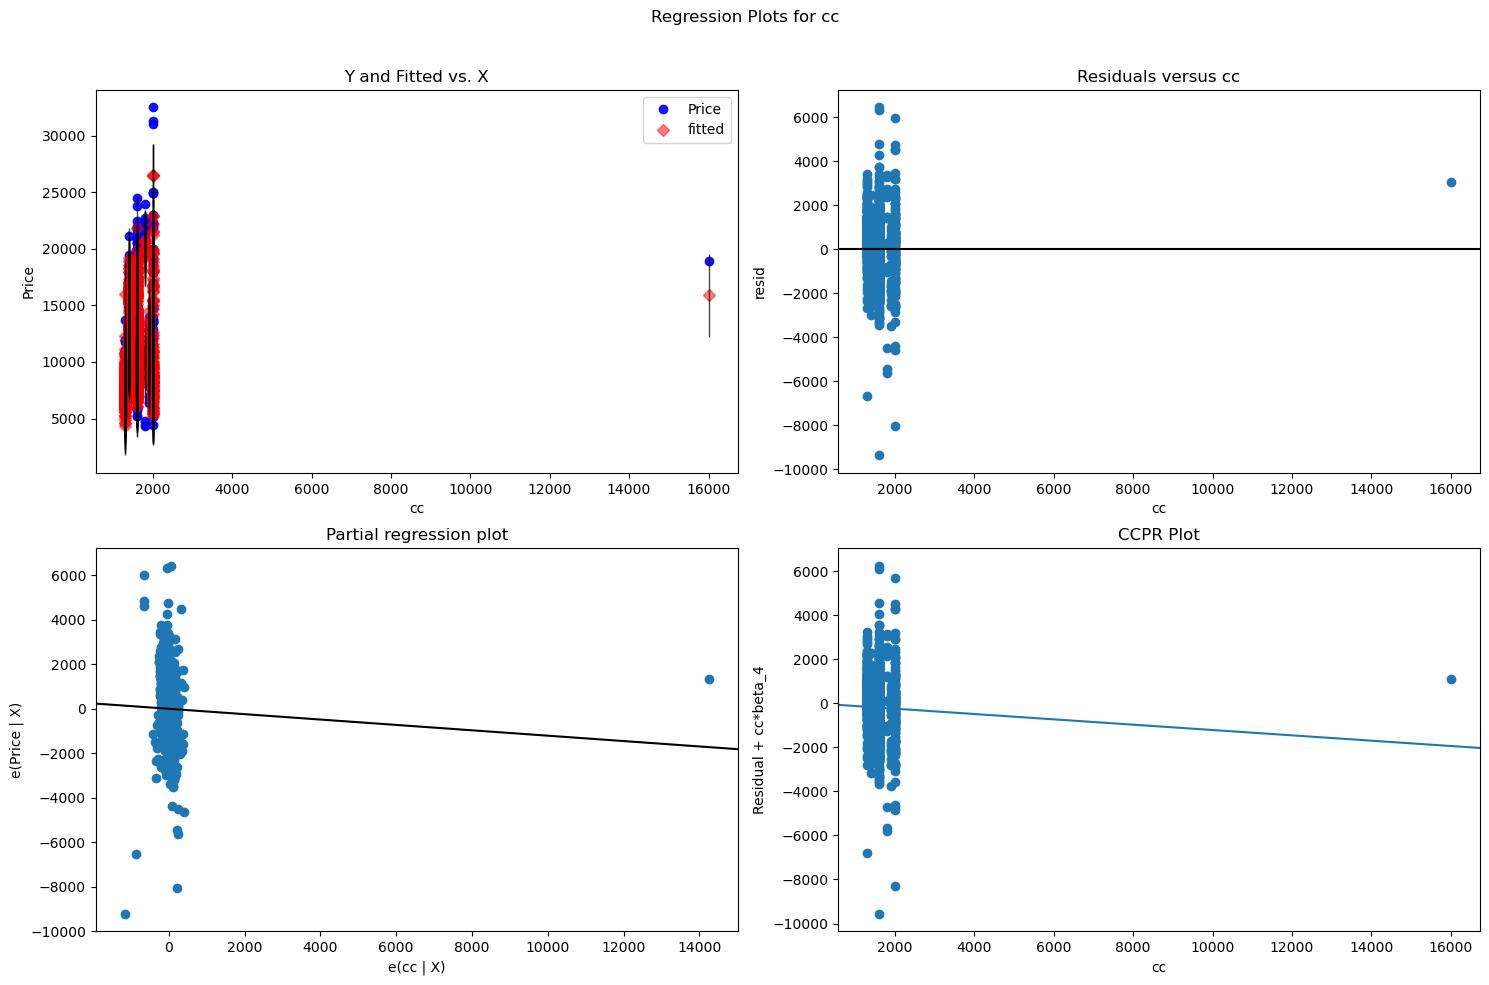

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

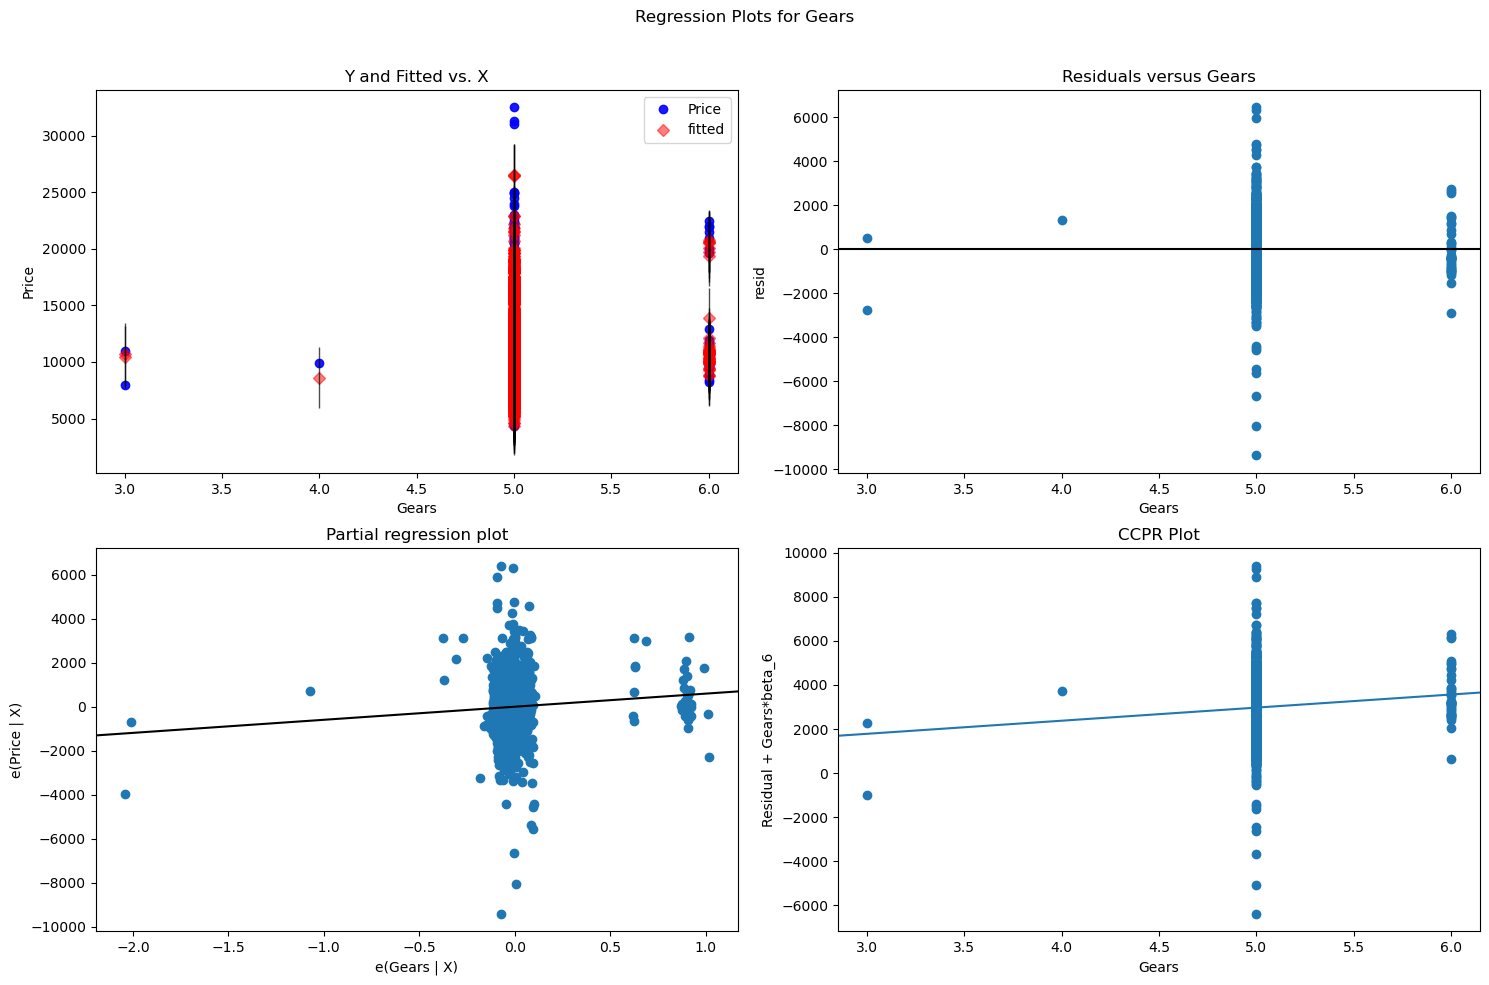

In [25]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

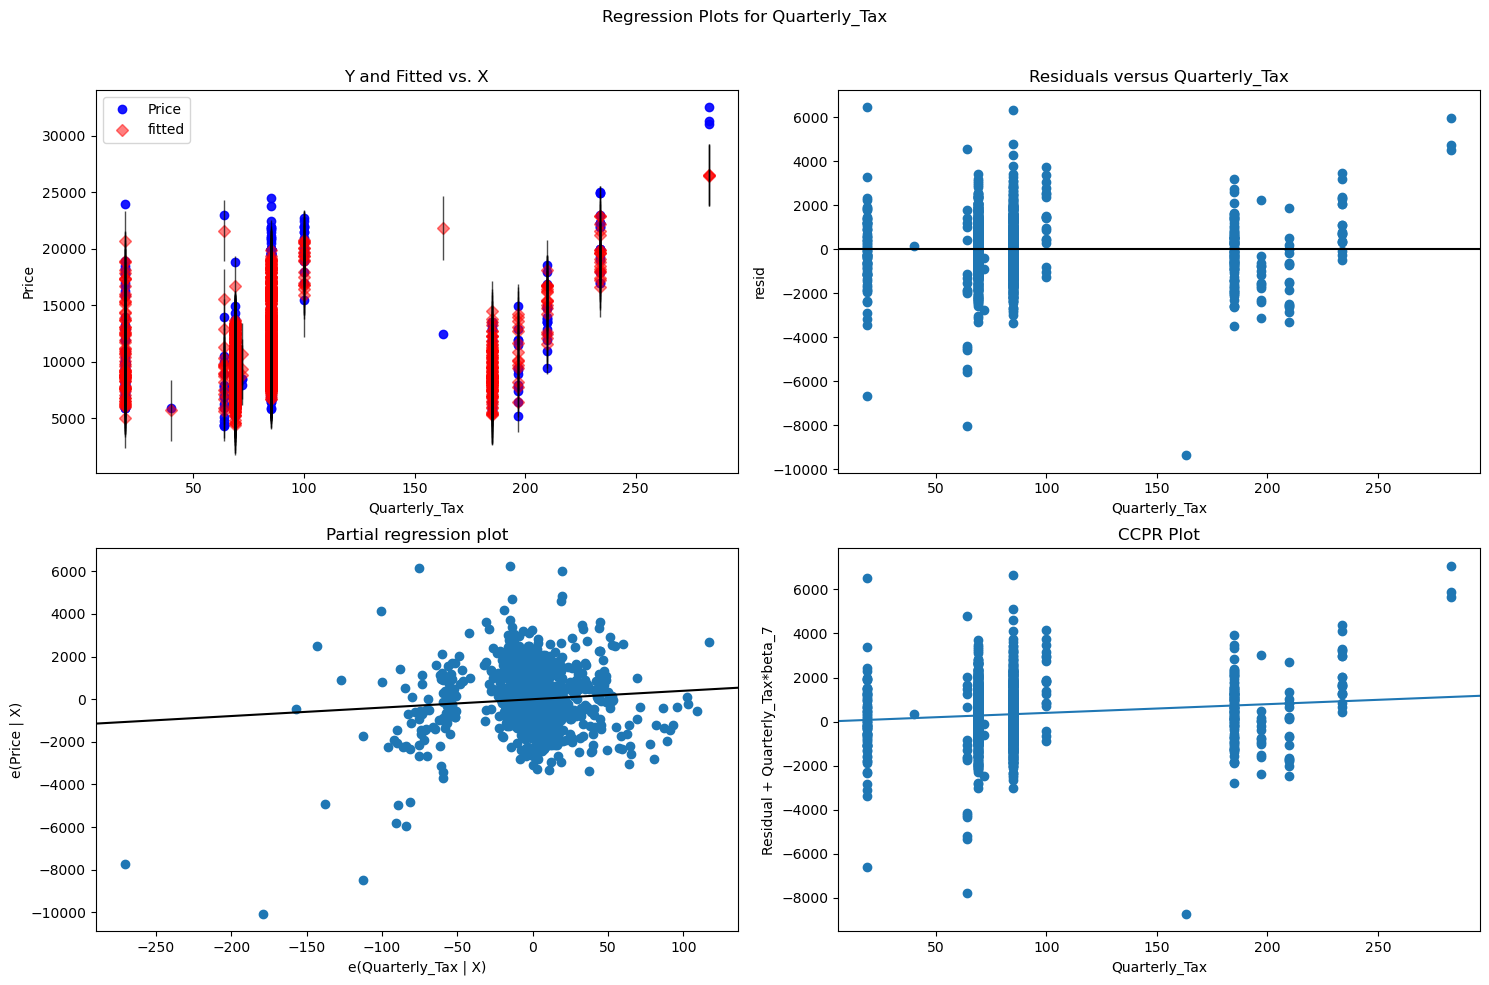

In [26]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

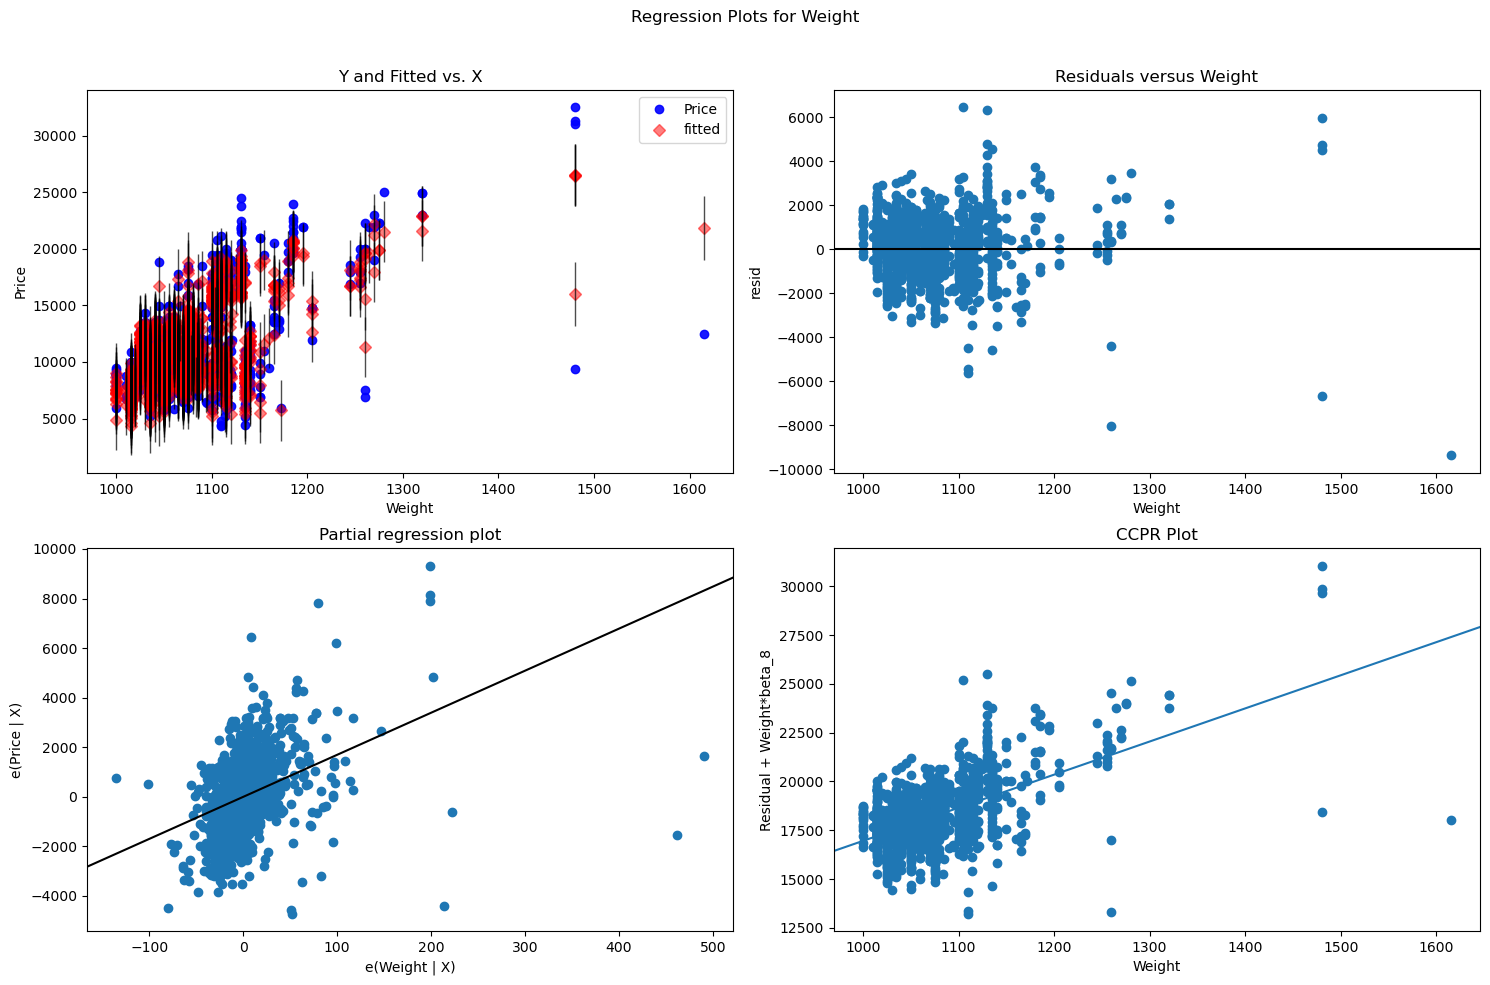

In [27]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

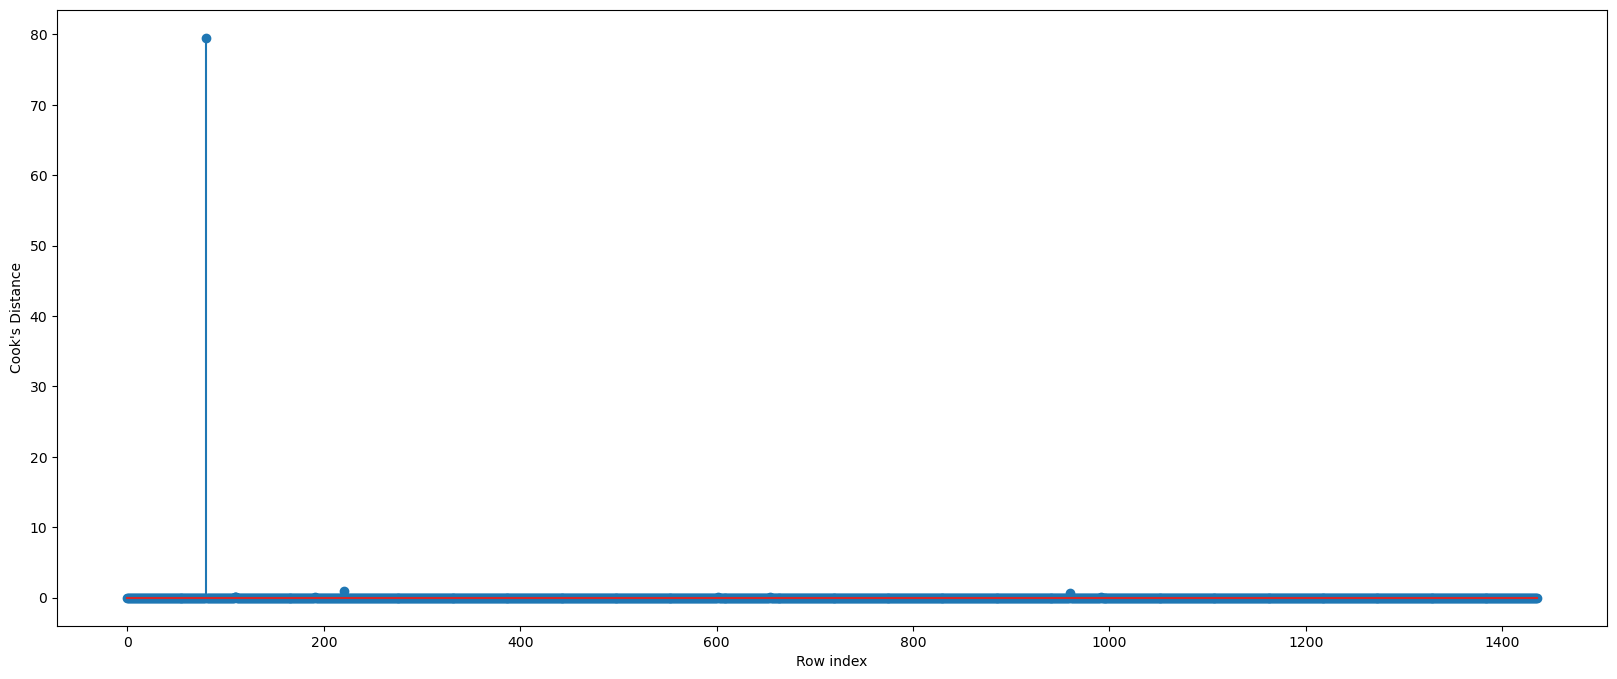

In [28]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

fig = plt.figure(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cook's Distance")
plt.show()

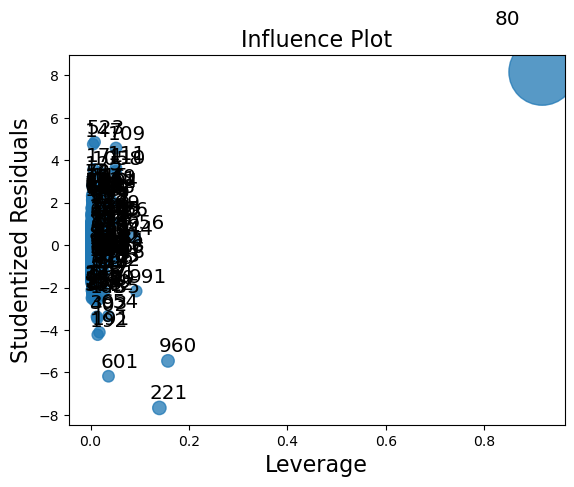

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = data.shape[0]
n = data.shape[1]
leverage_cutoff = 3*((k+1)/n)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [32]:
data_new = pd.read_csv("D:\Data Science\Assignment\Assignment 5\ToyotaCorolla_updated.csv")
data_latest = data_new.drop(data_new.index[[80]],axis=0).reset_index()
data_latest.drop(['index'] , axis=1)

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,20544,86,1300,3,5,69,1025
1431,1439,10845,72,19000,86,1300,3,5,69,1015
1432,1440,8500,71,17016,86,1300,3,5,69,1015
1433,1441,7250,70,16916,86,1300,3,5,69,1015


In [33]:
data_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          1435 non-null   int64
 1   Id             1435 non-null   int64
 2   Price          1435 non-null   int64
 3   Age_08_04      1435 non-null   int64
 4   KM             1435 non-null   int64
 5   HP             1435 non-null   int64
 6   cc             1435 non-null   int64
 7   Doors          1435 non-null   int64
 8   Gears          1435 non-null   int64
 9   Quarterly_Tax  1435 non-null   int64
 10  Weight         1435 non-null   int64
dtypes: int64(11)
memory usage: 123.4 KB


In [34]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=data_latest).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:20:30   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""